In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_csv("D:\DA-Class\DA2212R1\Datasets\OnlineRetail.csv", encoding = "ISO-8859-1")

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
d1 = df[['InvoiceNo', 'InvoiceDate']]
d1 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
d1 = d1.set_index(['InvoiceDate'])
d2 = d1['2011']
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.date).count()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9908\1059690392.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2 = d1['2011']


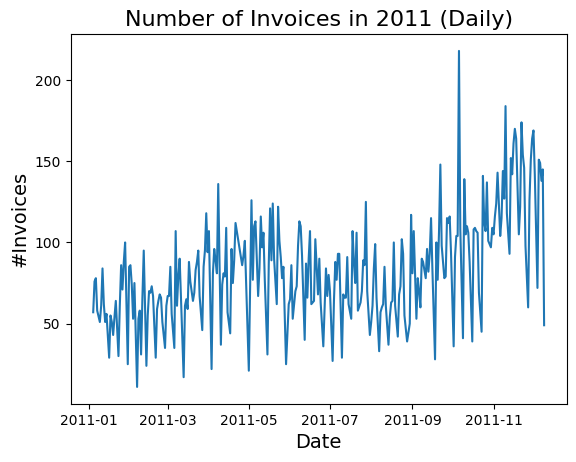

In [5]:
# Vẽ biểu đồ đường.
x = d3.index.get_level_values(0)
plt.plot(x, d3['InvoiceDate'])
plt.title('Number of Invoices in 2011 (Daily)', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()

Nhận xét:

Số lượng đơn hàng ngày có sự thay đổi mạnh.
Giữa tháng 10 và 11 có 1 ngày có số đơn tăng đột biến.
Tuy nhiên, biểu đồ này không thể hiện được việc thiếu dữ liệu trong 1 số ngày (do cách nhóm dữ liệu).

In [6]:
d4 = d2.groupby(by=d2['InvoiceDate'].dt.month).count()
print(d4)

             InvoiceDate  InvoiceNo
InvoiceDate                        
1                   1476       1476
2                   1393       1393
3                   1983       1983
4                   1744       1744
5                   2162       2162
6                   2012       2012
7                   1927       1927
8                   1737       1737
9                   2327       2327
10                  2637       2637
11                  3462       3462
12                  1015       1015


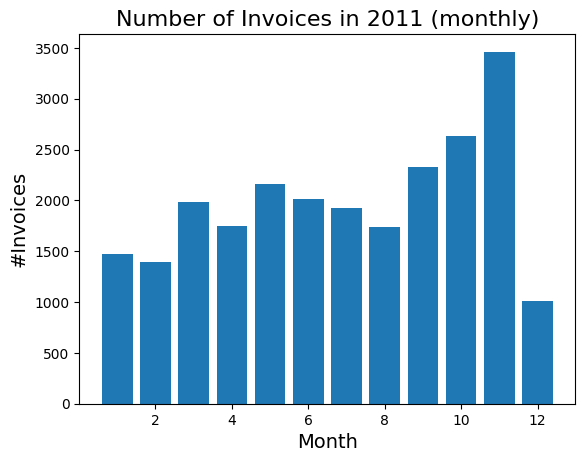

In [7]:
# Vẽ biểu đồ cột so sánh số lượng đơn hàng trong mỗi tháng năm 2011
x = d4.index.get_level_values(0)
plt.bar(x, d4['InvoiceDate'])
plt.title('Number of Invoices in 2011 (monthly)', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()

Nhận xét:

3 tháng 9, 10, 11 có số lượng đơn hàng tăng đáng kể, trong đó tháng 11 có số đơn hàng cao nhất.
Tháng 12 có tổng số lượng đơn hàng thấp nhất.